In [1]:
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, euclidean

import sys
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./health-dataset/word2vec.csv', header=None)
dataset = np.array(df.values)

# PCA

In [29]:
pca = PCA(n_components=0.90)
dataset_PCA = pca.fit_transform(dataset)
pca.n_components_

104

In [30]:
def kmeans_func():
    N = 5
    verbose = False

    km_PCA = KMeans(n_clusters=N, init='k-means++', max_iter=1200, n_init=3, n_jobs=6,
                    verbose=verbose)

    print("Clustering sparse data with {}".format(km_PCA))
    t0 = time()

    km_PCA.fit(dataset_PCA)
    print("done in {}s".format(time() - t0))
    return km_PCA

In [31]:
km_PCA = kmeans_func()
closest_PCA, distances_PCA = pairwise_distances_argmin_min(km_PCA.cluster_centers_, dataset_PCA)
print(closest_PCA, distances_PCA)

while not (np.unique(closest_PCA).shape == closest_PCA.shape):
    km_PCA = kmeans_func()
    closest_PCA, distances_PCA = pairwise_distances_argmin_min(km_PCA.cluster_centers_, dataset_PCA)

    print(closest_PCA, distances_PCA)

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
    n_clusters=5, n_init=3, n_jobs=6, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 0.6939334869384766s
[ 455 1386  554 7987  219] [0.4610243  0.39691355 0.40443733 0.43646658 0.44054166]


In [32]:
silhouette_PCA = metrics.silhouette_score(dataset_PCA, km_PCA.labels_)

silhouette_PCA

0.005141070149465337

In [33]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
len(health_lines)

13229

In [34]:
for i in enumerate(closest_PCA):
#     print(i)
    print('Cluster {}: {}'.format(i[0], health_lines[i[1]]))

Cluster 0: RT @CDCgov: CDC #Ebola experts have advised @EmoryUniversity Hospital there is no public health concern w/ release of these patients.

Cluster 1: RT @kellywallacetv: What's the advice when your child wants to stop a physical activity &amp; you know it's good for them to keep doing it? #fi…

Cluster 2: RT @drsanjaygupta: meet the doctor and get a first look at the room where ebola patients will be treated in the US.

Cluster 3: Blood sugar is NOT what matters most for preventing heart disease in people with #diabetes, new study finds

Cluster 4: Bently the dog has tested negative for #Ebola #Dallas city officials say. He's still in quarantine



In [35]:
labels = km_PCA.labels_
count = 0
for i in labels:
    if i == 3:
        print("Cluster {}: {}".format(i, health_lines[count]))
    count += 1

Cluster 3: A plant-based diet that incorporates fish may be the key to preventing colorectal cancers:

Cluster 3: Maysoon Zayid, a touring standup comic with Cerebral Palsy, has a message to share.

Cluster 3: How women can wipe out Alzheimer's, from @mariashriver. 

Cluster 3: RT @CNNOpinion: Women can defeat #Alzheimers, says @mariashriver. #WipeOutAlz challenge will make it happen.

Cluster 3: CDC: Misuse of garments may have led to release of bioterror bacteria at Tulane monkey lab.

Cluster 3: Losing a brain tumor, gaining perspective: CNN's Jessica Moskowitz's #FirstPerson experience.

Cluster 3: You may be your germs: Microbe genes slipped into human DNA, study says.

Cluster 3: RT @CNN: A plant-based diet that incorporates fish may be the key to preventing colorectal cancers:

Cluster 3: Robert Downey Jr. presents a child with his own 'Iron Man' robotic arm.

Cluster 3: RT @cnntech: Tim Cook tried to give Steve Jobs his liver

Cluster 3: RT @CNNMoney: This computer can diagnose


Cluster 3: Tumors grown in dishes could help customize cancer treatment  

Cluster 3: Uncommon form of heart attack likely runs in family, study finds  

Cluster 3: Deadly mosquito-borne diseases could threaten UK within decades, experts warn 

Cluster 3: Chilean girl with illness changes mind about euthanasia

Cluster 3: Cattle parasite study points to possible way to fight malaria 

Cluster 3: Monsanto weed killer can 'probably' cause cancer, WHO says  

Cluster 3: Artificial sweetener may help treat aggressive cancers, study finds 

Cluster 3: 10 treatments for vaginal pain  

Cluster 3: Should patients remind health workers to wash their hands? 

Cluster 3: Rare case: Woman dies after yellow-fever vaccine 

Cluster 3: Omega-3 supplements may help boys with ADHD  

Cluster 3: Utah mom of special-needs triplets facing breast cancer battle 

Cluster 3: Biogen releases Alzheimer's drug data 

Cluster 3: College athlete Lauren Hill’s fundraising inspires $15G donation 

Cluster 3: Conc

Cluster 3: #ADHD Treatments Not Working for Most Young Children

Cluster 3: Nerve Stimulation Cuts Down On #Migraines

Cluster 3: Silent Atrial Fibrillation May Be Behind #Stroke

Cluster 3: Too little money is spent researching breast cancer prevention, according to a new report

Cluster 3: Positive BRCA Test May Not Have Negative Emotional Impact

Cluster 3: Leptine, a hormone involved in appetite and metabolism, could help treat weight-related asthma:

Cluster 3: Women who test positive for BRCA genetic mutations have less emotional distress.

Cluster 3: Shopping around for hip surgery?

Cluster 3: US #cancer death rates drop 20%

Cluster 3: How can #Giant pandas cure human infections?

Cluster 3: Teen drinking may boost odds of precancerous breast changes:

Cluster 3: When people who have never smoked get lung cancer:

Cluster 3: Poor Nutrition Can Affect #Sleep

Cluster 3: Vaccine With Drug Payload Shows Promise Against #LiverCancer

Cluster 3: Alzheimer's questionnaire helps iden


Cluster 3: GP hours scheme 'to benefit 7m'

Cluster 3: Fund cancer research, insurers urged

Cluster 3: Why insurers should fund medical research

Cluster 3: Goggles help surgeons ‘see’ tumours

Cluster 3: How often is prostate cancer misdiagnosed?

Cluster 3: AUDIO: Man held for giving wife pain patch

Cluster 3: VIDEO: Hi-tech goggles 'detect cancer cells'

Cluster 3: Doctors implant lab-grown vagina

Cluster 3: Half of prostate cancer misdiagnosed

Cluster 3: 'Selfie' body image warning issued

Cluster 3: 'Millions wasted' on flu drug

Cluster 3: Male eating disorders 'overlooked'

Cluster 3: 'Youngest baby' with ear implants

Cluster 3: Spinal shocks revive paralysed legs

Cluster 3: AUDIO: 'Rare condition which makes me smell'

Cluster 3: Cancer virus discovery helped by delayed flight

Cluster 3: HIV home test kits given go-ahead

Cluster 3: Good teeth may help sporting success

Cluster 3: 'Huge variation' between hospitals

Cluster 3: Liver transplant scheme for drinkers

Clust

In [36]:
run = True
if run:
    Nc = range(2, 20)

    kmeans = []
    score = []
    silhouettes = []

    for i in Nc:
        kmeans.append(KMeans(n_clusters=i, n_init=3, n_jobs=i, max_iter=1200))

    for i in range(len(kmeans)):
        print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
        score.append(kmeans[i].fit(dataset_PCA).inertia_)
        silhouettes.append(metrics.silhouette_score(dataset_PCA, kmeans[i].labels_))

Fitting kmeans with 2 clusters
Fitting kmeans with 3 clusters
Fitting kmeans with 4 clusters
Fitting kmeans with 5 clusters
Fitting kmeans with 6 clusters
Fitting kmeans with 7 clusters
Fitting kmeans with 8 clusters
Fitting kmeans with 9 clusters
Fitting kmeans with 10 clusters
Fitting kmeans with 11 clusters
Fitting kmeans with 12 clusters
Fitting kmeans with 13 clusters
Fitting kmeans with 14 clusters
Fitting kmeans with 15 clusters
Fitting kmeans with 16 clusters
Fitting kmeans with 17 clusters
Fitting kmeans with 18 clusters
Fitting kmeans with 19 clusters


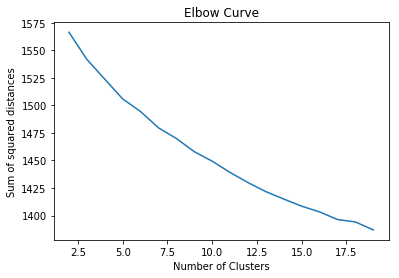

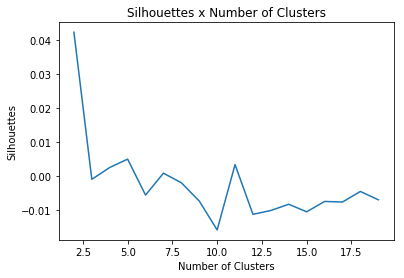

In [37]:
if run:
    plt.plot(Nc,score)

    plt.xlabel('Number of Clusters')

    plt.ylabel('Sum of squared distances')

    plt.title('Elbow Curve')

    plt.show()
    
    
    plt.plot(Nc,silhouettes)

    plt.xlabel('Number of Clusters')

    plt.ylabel('Silhouettes')

    plt.title('Silhouettes x Number of Clusters')

    plt.show()